# Brightfield timelapse example

Note: The sample images have been rescaled and are 8-bit depth.

## Install and import the dependencies

In [1]:
# install the basicpy in case of Google Colaboratory
try:
    import google.colab

    %pip uninstall -yq basicpy
    %pip install --upgrade -q basicpy
except ModuleNotFoundError:
    pass

In [2]:
import pathlib
import skimage
import numpy as np

from basicpy import BaSiC
from basicpy import datasets as bdata
from matplotlib import pyplot as plt

## Load the sample images

(128, 171)
uint8


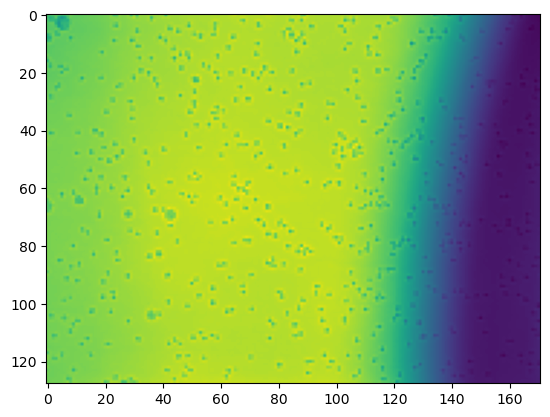

In [3]:
images = bdata.timelapse_brightfield()
plt.imshow(images[10])

print(images[10].shape)
print(images[10].dtype)

## Fit the flatfield and darkfield

Note: `smoothness_flatfield` is defaulted as 1. If you change from this default, make sure to change the `smoothness_darkfield` value as well (default = 1).

In [4]:
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images)

## Plot the fit results

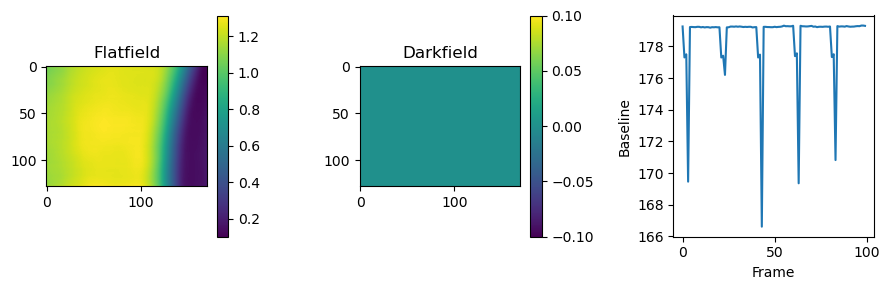

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

## Correct the original images

In [6]:
images_transformed = basic.transform(images)

## Plot the corrected results

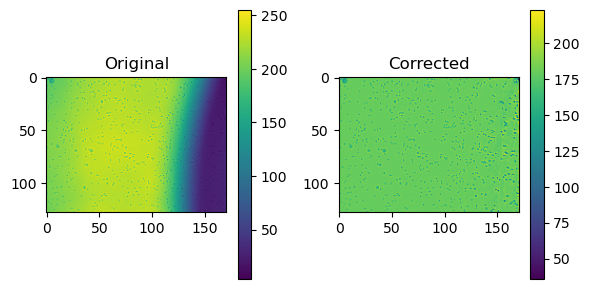

In [7]:
i = 12
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
im = axes[0].imshow(images[i])
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i])
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()

## Important!

Images after transformation are in 32-bit. If this differs from the original image bit-depth, include a conversion below for the tuple of np.arrays:

**8-bit**
```python
# makes the negatives 0
images_transformed[images_transformed < 0] = 0  
# normalize the data to 0 - 1
images_transformed = images_transformed / np.max(images_transformed) 

# scale by 255 (2^8 - 1) for 8-bit conversion
images_transformed = 255 * images_transformed

# round the values to integers and then convert to 8-bit data type
corrected_transformed_images = images_transformed.round().astype(np.uint8)
```

**16-bit**
```python
# makes the negatives 0
images_transformed[images_transformed < 0] = 0 
# normalize the data to 0 - 1
images_transformed = images_transformed / np.max(images_transformed)

# scale by 65535 (2^16 - 1) for 16-bit conversion
images_transformed = 65535 * images_transformed

# round the values to integers and then convert to 16-bit data type
corrected_transformed_images = images_transformed.round().astype(np.uint16)
```

## Output images (Optional)

Note: Must use `skimage.io.imsave` to output the images.

In [8]:
# set output directory for images
output_dir = pathlib.Path("./tmpdir")
output_dir.mkdir(exist_ok=True)

# Convert the images to 8-bit like the original images
# makes the negatives 0
images_transformed[images_transformed < 0] = 0  
# normalize the data to 0 - 1
images_transformed = images_transformed / np.max(images_transformed) 

# scale by 255 (2^8 - 1) for 8-bit conversion
images_transformed = 255 * images_transformed

# round the values to integers and then convert to 8-bit data type
corrected_transformed_images = images_transformed.round().astype(np.uint8)

for i, image in enumerate(corrected_transformed_images):
        image_filename = f"{output_dir}/image_{i}.png" # You can change this to output the original names
        skimage.io.imsave(image_filename, image)